In [350]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
df = pd.read_csv("D:\AFame Tech\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [353]:
#SibSp basically shows the number of siblings or spouse that were travelling with a person
#Parch: If you have parents or children on the ship

In [354]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [355]:
# so the maximum number of family members on the ship were 6 and maximum number of siblings was 8

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


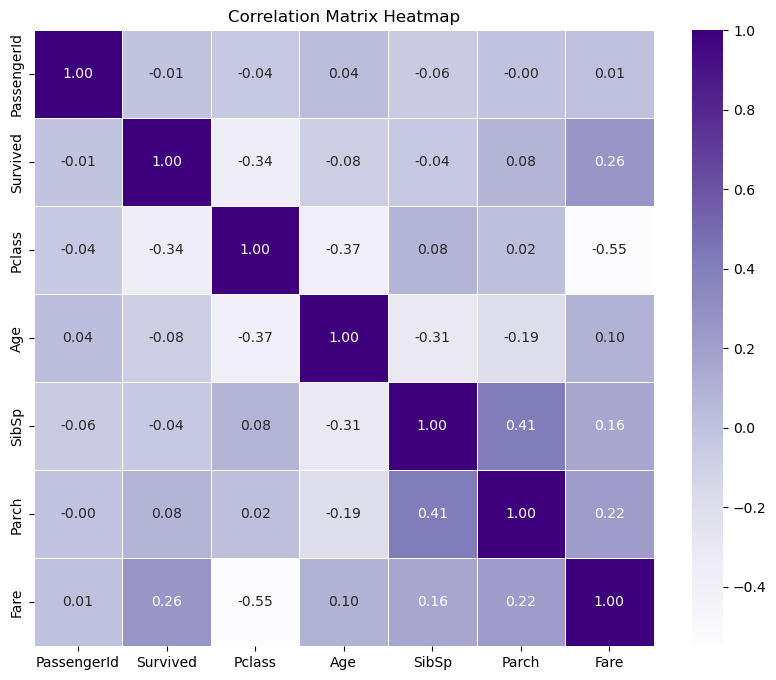

In [357]:
import seaborn as sns

# Exclude non-numeric columns from correlation calculation
df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="Purples", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [358]:
# Pclass: 1 = Upper, 2 = Middle, 3 = Lower
# Pclass or Socio-Economic class is hihgly negatively correlated
# which means Lower the number in Pclass = Higher in survival
# So 1 means upper class (lower in numeric basis) had more survivors (0,1).

# Fare rate is positevely correlated to survived which obviously makes sense 

# Fare and Pclass is negatively correlated because (Pclass = 1(Upper)) will have a higher price

In [359]:
# Stratified Shuffle Split

In [360]:
# Importing the dataset again because the non numeric values were lost while making the heat map
df = pd.read_csv("D:\AFame Tech\Titanic-Dataset.csv")

In [361]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df, df[["Survived", "Pclass", "Sex"]]):
    strat_train_data = df.loc[train_indices]
    strat_test_data = df.loc[test_indices]

In [362]:
strat_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


In [363]:
strat_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S


In [364]:
# Now checking the if there are similar distribution of the important features (survived, pclass) of the split datasets
# This is why we did a StratifiedShuffleSplit because sometimes the training data and testing data may get split into
# 2 parts that are quite different from one another, with this method the data and the important features are split and
# distributed as such that there are similarities.

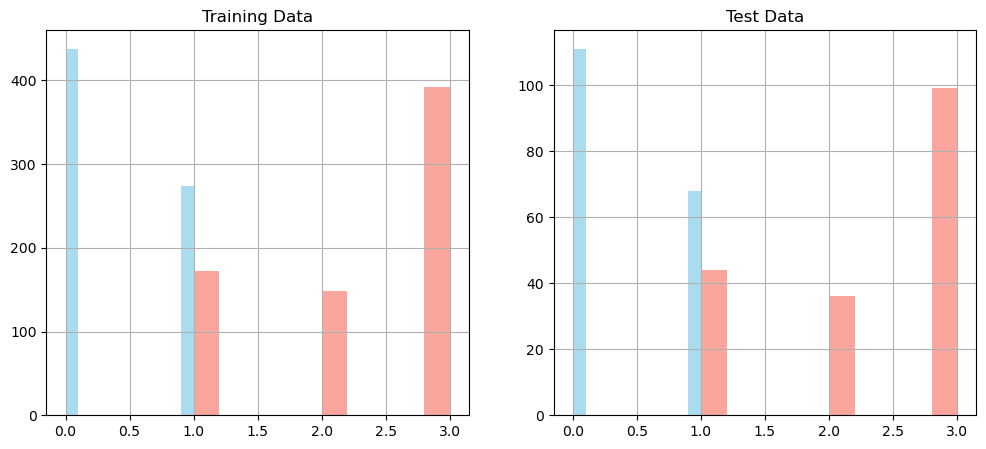

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
strat_train_data["Survived"].hist(color='skyblue', alpha=0.7)
strat_train_data["Pclass"].hist(color='salmon', alpha=0.7)
plt.title("Training Data")

plt.subplot(1, 2, 2)
strat_test_data["Survived"].hist(color='skyblue', alpha=0.7)
strat_test_data["Pclass"].hist(color='salmon', alpha=0.7)
plt.title("Test Data")

# Skyblue = Survived
# Salmon = Pclass

plt.show()

In [366]:
# As we can see the distribution is quite similar.

In [367]:
strat_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

In [368]:
strat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 316 to 771
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [369]:
# Imputing missing age values with a neutral strategy.
# Cabin feature will probably be dropped as it doesn't really matter for the prediction so its null values aren't a problem.

In [370]:
# Estimators
# A class that allows us to intricate objects
# Intricate: Small parts or details put together
# with estimators through fit.transform() we will hande all the values and chain them together into a pipeline

In [371]:
# BaseEstimator is a class which will be used to define fit, transform etc.
# TransofrmerMixin allows us to automatically mix Fix and Transform into FitTransform without having to define it explicitly.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        imputer = SimpleImputer(strategy = "mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [372]:
# Embarked has 3 values C,S,Q which are the cities from which passangers embarked on.
# We will use OneHotEncoding to turn those into numerical values.
# Same thing will be done with Gender.

In [373]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
                       
        column_names = ["female","male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]       
        
        return X

In [374]:
# Now we will be dropping featured that are not needeed such as Name and Ticket.
# And the features that are now transformed such as Embareked and Sex, they will be dropped.
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

In [375]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimpute",AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [376]:
# So first we saw that there are 139 null values in age column and we used AgeImputer Class to
# fill in the null values using a Mean strategy to fill the values.

# Then the Embarked feature showed the cities from which the passangers embarked from C,S,Q and we transformed them
# to numerical values using OneHotEncoder to array.

# Then we dropped some features using FeatureDropper such as Name and Ticket column because they will not be needed
# for our prediction anyways.

# And then at last we have stored all of them in the Pipeline from sklearn.pipeline.

In [377]:
strat_train_data = pipeline.fit_transform(strat_train_data)

In [378]:
strat_train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
316,317,1,2,24.000000,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
785,786,0,3,25.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
457,458,1,1,29.762119,1,0,51.8625,0.0,0.0,1.0,1.0,0.0
627,628,1,1,21.000000,0,0,77.9583,0.0,0.0,1.0,1.0,0.0
218,219,1,1,32.000000,0,0,76.2917,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,29.762119,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
856,857,1,1,45.000000,1,1,164.8667,0.0,0.0,1.0,1.0,0.0
598,599,0,3,29.762119,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
200,201,0,3,28.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0


In [379]:
strat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 316 to 771
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  female       712 non-null    float64
 11  male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [380]:
# Now we will scale the data

In [381]:
from sklearn.preprocessing import StandardScaler

X = strat_train_data.drop(["Survived"], axis = 1)
y = strat_train_data["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [382]:
X_data

array([[-4.85757619e-01, -3.70196244e-01, -4.35106773e-01, ...,
         5.96816954e-01,  1.35941164e+00, -1.35941164e+00],
       [ 1.34652223e+00,  8.27893418e-01, -3.59595183e-01, ...,
         5.96816954e-01, -7.35612358e-01,  7.35612358e-01],
       [ 6.50983688e-02, -1.56828591e+00, -2.68271058e-16, ...,
         5.96816954e-01,  1.35941164e+00, -1.35941164e+00],
       ...,
       [ 6.15954357e-01,  8.27893418e-01, -2.68271058e-16, ...,
        -1.67555562e+00, -7.35612358e-01,  7.35612358e-01],
       [-9.38944106e-01,  8.27893418e-01, -1.33060414e-01, ...,
         5.96816954e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.29182731e+00,  8.27893418e-01,  1.37717138e+00, ...,
         5.96816954e-01, -7.35612358e-01,  7.35612358e-01]])

In [383]:
y_data

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [384]:
# GridSearchCV, CV stands for cross validation
# CrossValidation: If we have 10 folds data and take 9 folds and train it and you validate it with the 1 last fold
# We do this with all the possible combination. This is CV. Each of these folds are used once for validation.
# We dont do that we test dataset, we do that inside the training dataset

# GridSearch used Cross Validation to defines the optimal parameters 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 50, 100, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

# Now CV will build a RandomForestClassifier with n_estimators as 15, max_depth as 5 and min_sample_split as 3 
# and then it will do it with all possible combinations until all the combinations are complete and then it will
# give us the combination which performed the best.

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

# cv = 3 means there will be 3 folds

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 50, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [385]:
final_clf = grid_search.best_estimator_

In [387]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=500)

In [388]:
strat_test_data = pipeline.fit_transform(strat_test_data)

In [389]:
strat_test_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
389,390,1,2,17.000000,0,0,12.0000,1.0,0.0,0.0,1.0,0.0
656,657,0,3,29.447552,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
582,583,0,2,54.000000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
616,617,0,3,34.000000,1,1,14.4000,0.0,0.0,1.0,0.0,1.0
888,889,0,3,29.447552,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,438,1,2,24.000000,2,3,18.7500,0.0,0.0,1.0,1.0,0.0
746,747,0,3,16.000000,1,1,20.2500,0.0,0.0,1.0,0.0,1.0
426,427,1,2,28.000000,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
747,748,1,2,30.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0


In [390]:
X_test = strat_test_data.drop(["Survived"], axis=1)
y_test = strat_test_data["Survived"]

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [391]:
final_clf.score(X_data_test, y_data_test)

0.8268156424581006

In [392]:
# Now we will combine this training and testing data into the final data and train them again.

In [393]:
# This is why the pipeline feature is so useful because we dont have to write the code again to combine it.
final_data = pipeline.fit_transform(df)

In [394]:
X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [395]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

production_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(production_clf, param_grid, cv = 3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [396]:
production_clf = grid_search.best_estimator_
production_clf

RandomForestClassifier(max_depth=5, n_estimators=10)

In [397]:
# Now to make the predictions on the original titanic dataset we will take df and drop Survived column from it under the name final_df.

In [399]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,S,Q,N,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0.0,0.0,1.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,0.0,0.0,1.0


In [398]:
final_df = df.drop(["Survived"])

KeyError: "['Survived'] not found in axis"

In [400]:
final_test_df = pipeline.fit_transform(final_df)

In [406]:
final_test_df 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,1,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [401]:
X_final_df = final_test_df

scaler= StandardScaler()
X_final_df_test = scaler.fit_transform(X_final_df)

In [402]:
predictions = production_clf.predict(X_final_df_test)

In [403]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [404]:
the_final_df = pd.DataFrame(df["PassengerId"])
the_final_df["Survived"] = predictions
the_final_df.to_csv("D:\AFame Tech\Titanic-Predictions.csv", index=False)

In [405]:
the_final_df

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1
